# Import Libraries

In [1]:
%matplotlib notebook
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# import plotly.express as px
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')

In [2]:
# Function to plot 3D scatter
def plot_comp_data(x,y,z,pred,xlabel,ylabel,zlabel):
    
    fig1 = plt.figure()
    fig_title = "Predicted vs Actual Happiness Score for " + xlabel + ", " + ylabel;
    fig1.suptitle(fig_title, fontsize=16)
    ax = plt.axes(projection='3d')
    ax.scatter(x,y,z,c='Green',marker='x',alpha=0.5, label='Actual')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.scatter(x,y,pred,c='Red',marker='<',alpha=0.5, label='Predicted')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.legend()
    
    
    fig2 = plt.figure(figsize=plt.figaspect(0.5))

    ax1 = fig2.add_subplot(2, 1, 1, projection='3d')
    ax1.set_title('Actual')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_zlabel(zlabel)
    ax1.scatter(x, y, z,c='Green',marker='x',alpha=0.9, label='Actual')
    ax1.legend()

    ax2 = fig2.add_subplot(2, 1, 2, projection='3d')
    ax2.set_title('Predicted')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax2.set_zlabel(zlabel)
    ax2.scatter(x, y, pred,c='Red',marker='x',alpha=0.9, label='Predicted')
    plt.tight_layout()
    ax2.legend()
    
    plt.show()

# Load Data & Preprocess

## 2017 Data

In [3]:
# Load 2017 data
raw_input_data = pd.read_csv("2017.csv")

raw_input_data.head() # Glance of data
print('2017 Raw Data Shape :',raw_input_data.shape) # Shape of the data
raw_input_data.describe() # Statistics of the data

# Columns to be dropped
drop_columns = ['Country','Happiness.Rank','Whisker.high','Whisker.low']
input_data = raw_input_data.drop(columns = drop_columns)
input_data.columns = ['Happiness_Score','GDP','Family','Life_Expectancy','Freedom','Generosity','Trust_government_Corruption','Dystopia_Residual']

input_data.head(); # Processed 2017 data

2017 Raw Data Shape : (155, 12)


## 2016 Data

In [4]:
# Load 2016 data
raw_input_2016 = pd.read_csv("2016.csv")
raw_input_2016.head()

# Columns to be dropped
dropCol2016 = ['Region', 'Country', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval']
input2016 = raw_input_2016.drop(columns = dropCol2016)
input2016 = input2016.reindex(columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual'])
input2016.columns = ['Happiness_Score','GDP','Family','Life_Expectancy','Freedom','Generosity','Trust_government_Corruption','Dystopia_Residual']

input2016.head(); # Processed 2016 data

## 2015 Data

In [5]:
# Load 2015 data
raw_input_2015 = pd.read_csv("2015.csv")
raw_input_2015.head()

# Columns to be dropped
dropCol2015 = ['Region', 'Country', 'Happiness Rank', 'Standard Error']
input2015 = raw_input_2015.drop(columns = dropCol2015)
input2015 = input2015.reindex(columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual'])
input2015.columns = ['Happiness_Score','GDP','Family','Life_Expectancy','Freedom','Generosity','Trust_government_Corruption','Dystopia_Residual']

input2015.head(); # Processed 2015 data

In [6]:
# Combine all datasets (2015, 2016, 2017)
input_data = input_data.append(input2016, ignore_index = True)
input_data = input_data.append(input2015, ignore_index = True)
print('Shape of Merged dataset : ',input_data.shape); # Shape of final dataset

Shape of Merged dataset :  (470, 8)


In [7]:
# Normalizing the data to get all the values of the dataframe to the range of (0,1)

data_normalized = (input_data - input_data.min())/(input_data.max() - input_data.min())
data_normalized.head()

,Happiness_Score,GDP,Family,Life_Expectancy,Freedom,Generosity,Trust_government_Corruption,Dystopia_Residual
0,0.989783,0.864065,0.952160,0.777046,0.948774,0.431957,0.572492,0.555249
1,0.986718,0.792394,0.963086,0.773046,0.934715,0.423924,0.726151,0.565702
2,0.983040,0.791458,1.000000,0.813023,0.936441,0.567420,0.278173,0.568269
3,0.980997,0.836545,0.941845,0.836997,0.925852,0.346686,0.664977,0.555161
4,0.975889,0.771648,0.956334,0.789230,0.922687,0.292913,0.693250,0.598894


## Multi-Layer Perceptron without "Dystopia Residual"

In [8]:
# Seperate data into X,Y (X - Features, Y - Label/Ground Truth/ Actual Value)

# X
X = data_normalized.drop(columns='Happiness_Score')
X_without_residual = X.drop(columns=['Dystopia_Residual'])

# Y - Happiness Score
Y = data_normalized['Happiness_Score']

## Splitting the data into training and testing 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_without_residual, Y, test_size=0.30, random_state=1)

## Model Selection

### Changing the number of neurons to observe the variation in RMSE. 
#### For each iteration, the model should be tested over same test data which was kept aside previously for correct implementation of model selection by cross-validation 

<IPython.core.display.Javascript object>


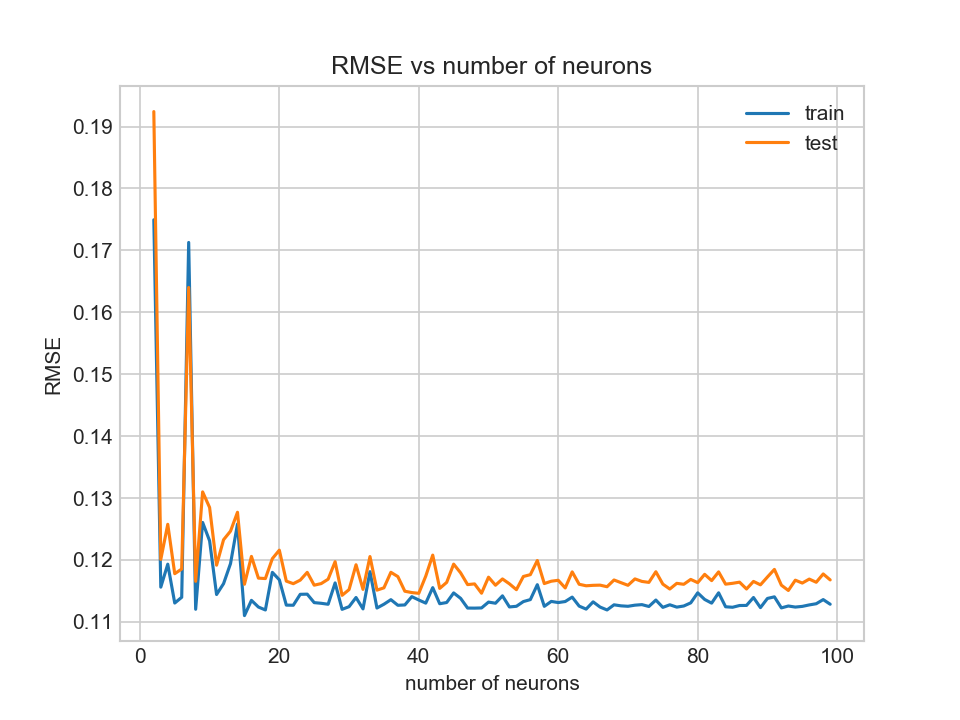

In [10]:
rmse_test_List = []
rmse_train_List = []
neurons_list = []

for i in range(2,100):
    neurons_list.append(i)
    mlp_wo_residual = MLPRegressor(hidden_layer_sizes=(i),max_iter=2500, activation='tanh', 
                                   random_state = 50, learning_rate = 'constant', learning_rate_init= 0.01)
    mlp_wo_residual.fit(X_train,y_train)
    predicted_train = mlp_wo_residual.predict(X_train)
    predicted_test = mlp_wo_residual.predict(X_test)
    RMSE_train = np.sqrt(np.mean((predicted_train - y_train)**2)) 
    RMSE_test = np.sqrt(np.mean((predicted_test - y_test)**2))
    rmse_train_List.append(RMSE_train)
    rmse_test_List.append(RMSE_test)

#     mlp_wo_residual_score = mlp_wo_residual.score(X_without_residual,Y);
#     print("MLP Score without residual :",mlp_wo_residual_score)

fig1 = plt.figure()
plt.plot(neurons_list,rmse_train_List, label = 'train')
plt.plot(neurons_list,rmse_test_List, label = 'test')
plt.xlabel('number of neurons')
plt.ylabel('RMSE')
plt.title('RMSE vs number of neurons')
plt.legend()
leastRMSE_ind = rmse_test_List.index(min(rmse_test_List))

In [11]:
leastRMSE_neurons = neurons_list[leastRMSE_ind]
print('The least values of RMSE was for 1 hidden layer with', leastRMSE_neurons, 'number of neurons')
print('and the RMSE value is ', min(rmse_test_List))

The least values of RMSE was for 1 hidden layer with 29 number of neurons
and the RMSE value is  0.11428424319839564


## Training on selected Model

In [12]:
mlpSelected = MLPRegressor(hidden_layer_sizes=leastRMSE_neurons,max_iter=2500, activation='tanh', 
                                   random_state = 50, learning_rate = 'constant', learning_rate_init= 0.01)
mlpSelected.fit(X_train,y_train)
predicted1 = mlpSelected.predict(X_without_residual)

# Results

<IPython.core.display.Javascript object>


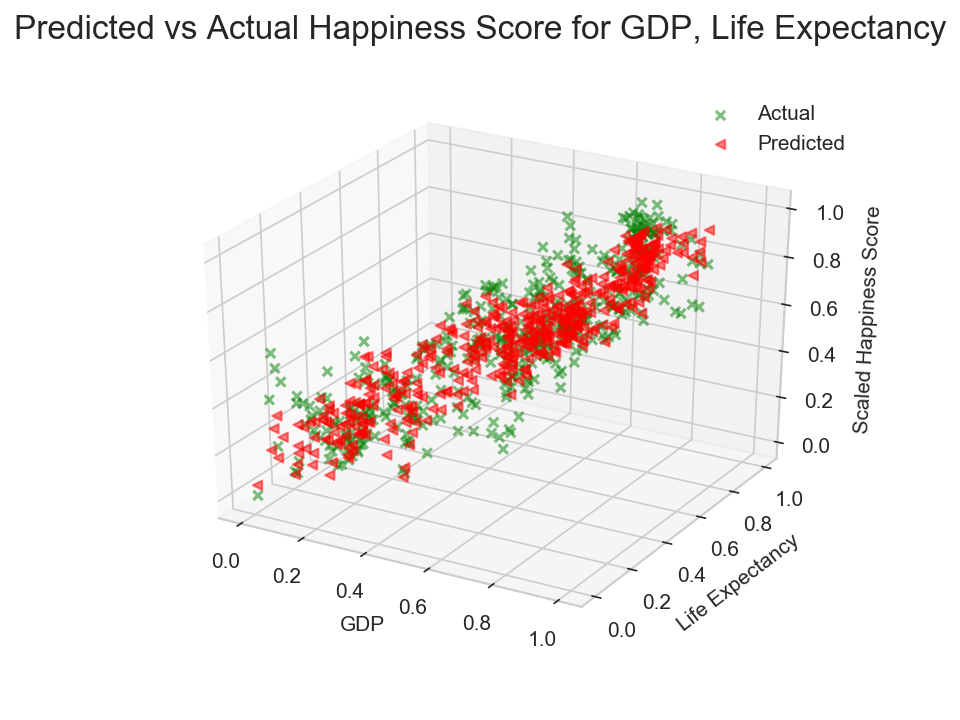

<IPython.core.display.Javascript object>


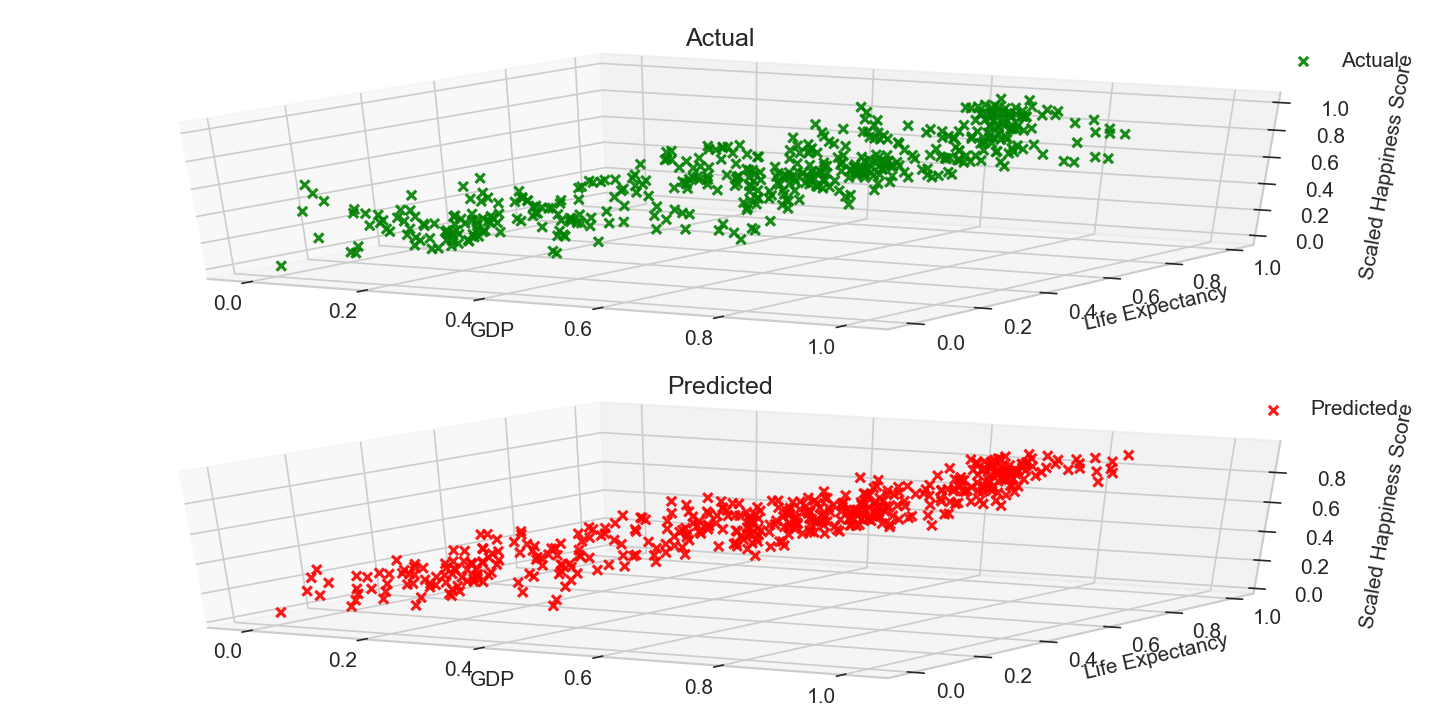

In [13]:
plot_comp_data(data_normalized['GDP'],data_normalized['Life_Expectancy'],data_normalized['Happiness_Score'],predicted1,"GDP",'Life Expectancy','Scaled Happiness Score')

# MLP for (Happiness Score modified as "Happiness Score - E[Dystopia Residual]")

In [14]:
# Mean of Dystopia Residual
mean_dr = np.mean(data_normalized['Dystopia_Residual'])
Y_mod = Y - mean_dr

## Splitting the data into training and testing 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_without_residual, Y_mod, test_size=0.30, random_state=1)

## Model Selection

### Changing the number of neurons to observe the variation in RMSE. 
#### For each iteration, the model should be tested over same test data which was kept aside previously for correct implementation of model selection by cross-validation 

<IPython.core.display.Javascript object>


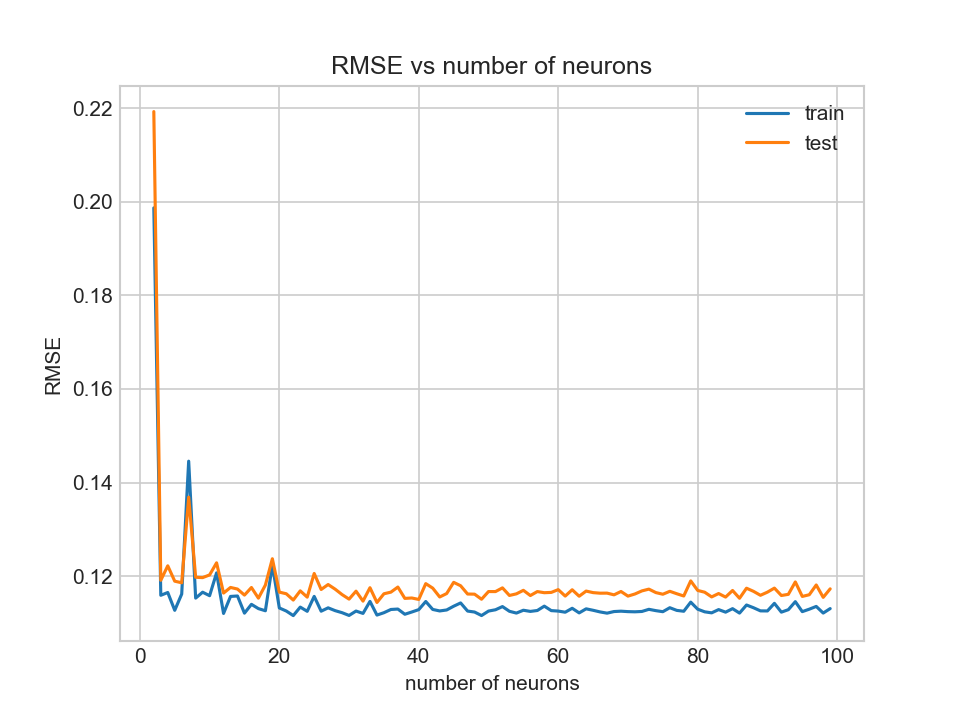

In [16]:
rmse_test_List = []
rmse_train_List = []
neurons_list = []

for i in range(2,100):
    neurons_list.append(i)
    mlp_wo_residual = MLPRegressor(hidden_layer_sizes=(i),max_iter=2500, activation='tanh', 
                                   random_state = 50, learning_rate = 'constant', learning_rate_init= 0.01)
    mlp_wo_residual.fit(X_train,y_train)
    predicted_train = mlp_wo_residual.predict(X_train)
    predicted_test = mlp_wo_residual.predict(X_test)
    RMSE_train = np.sqrt(np.mean((predicted_train - y_train)**2)) 
    RMSE_test = np.sqrt(np.mean((predicted_test - y_test)**2))
    rmse_train_List.append(RMSE_train)
    rmse_test_List.append(RMSE_test)

#     mlp_wo_residual_score = mlp_wo_residual.score(X_without_residual,Y);
#     print("MLP Score without residual :",mlp_wo_residual_score)

fig2 = plt.figure()
plt.plot(neurons_list,rmse_train_List, label = 'train')
plt.plot(neurons_list,rmse_test_List, label = 'test')
plt.xlabel('number of neurons')
plt.ylabel('RMSE')
plt.title('RMSE vs number of neurons')
plt.legend()
leastRMSE_ind = rmse_test_List.index(min(rmse_test_List))

In [17]:
leastRMSE_neurons2 = neurons_list[leastRMSE_ind]
print('The least values of RMSE with 1 hidden layer was for', leastRMSE_neurons2, 'number of neurons')
print('and the RMSE value is ', min(rmse_test_List))

The least values of RMSE with 1 hidden layer was for 34 number of neurons
and the RMSE value is  0.11434234500623475


## Training on selected Model

In [18]:
mlpSelected1 = MLPRegressor(hidden_layer_sizes=leastRMSE_neurons2,max_iter=2500, activation='tanh', 
                                   random_state = 50, learning_rate = 'constant', learning_rate_init= 0.01)
mlpSelected1.fit(X_train,y_train)
predicted2 = mlpSelected1.predict(X_without_residual)

# Results

<IPython.core.display.Javascript object>


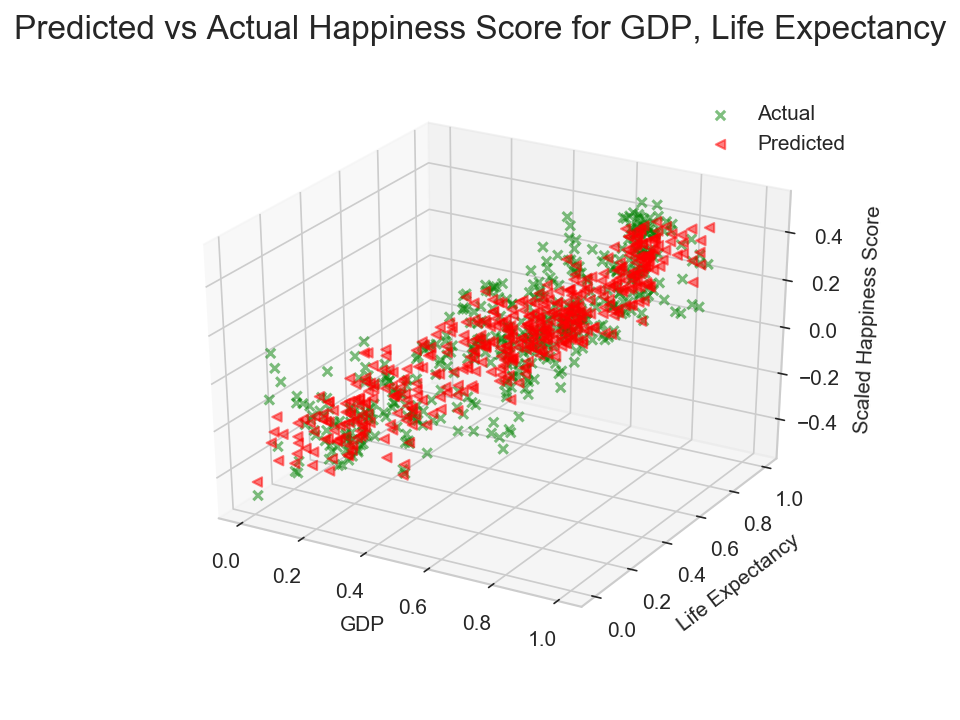

<IPython.core.display.Javascript object>


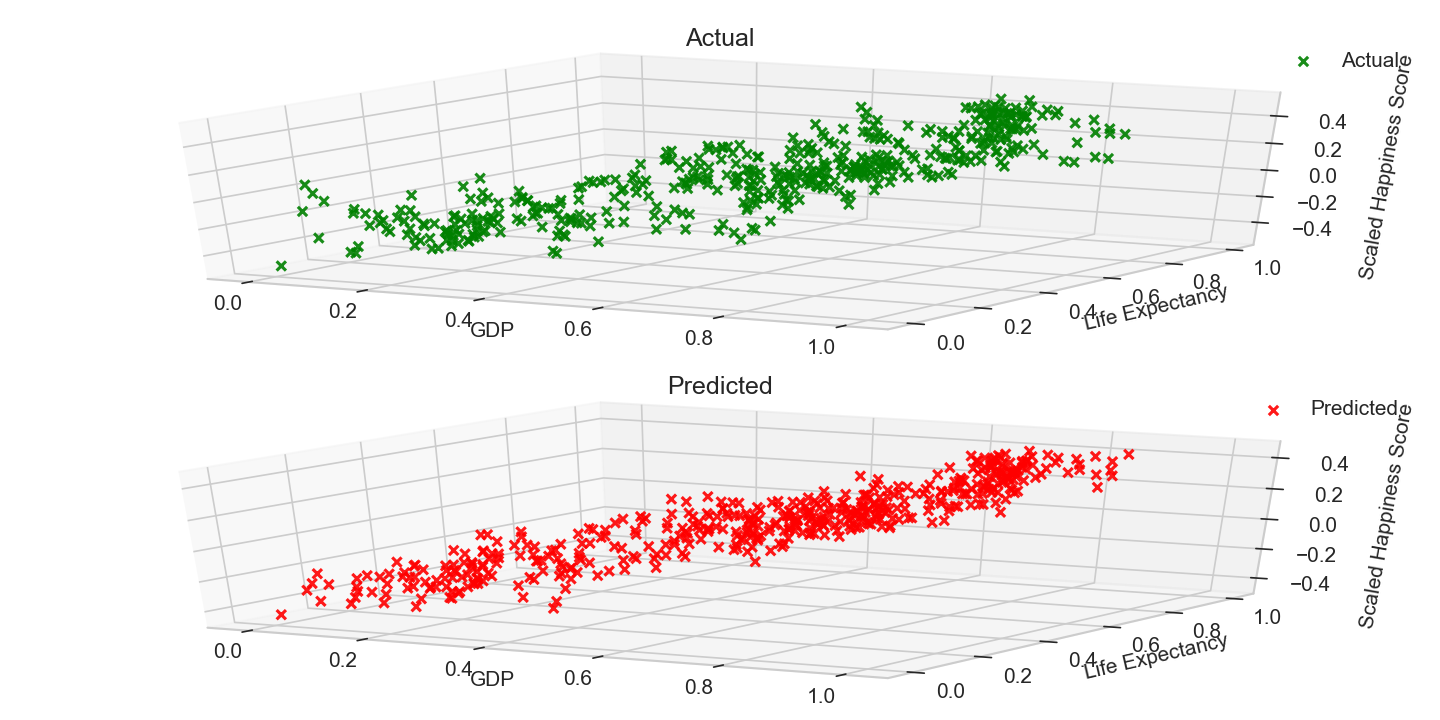

In [19]:
plot_comp_data(data_normalized['GDP'],data_normalized['Life_Expectancy'],Y_mod,predicted2,"GDP",'Life Expectancy','Scaled Happiness Score')